# Ahmed Sharaf
##  Numerical Optmization 
###         1 - Implementation  The Batch Gradient Descent 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functions To Help Visualization

In [10]:

def theta_loss(at0, at1, c, lr):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(15, 10)
    fig.suptitle('Ahmed Sharaf')
    theta = [at0, at1]
    for x in range(len(theta)):
        ax[x].plot(theta[x], c, '-o', label=f'Theta_{x} vs. Loss')
        ax[x].set_title(f'Theta_{x} vs. Loss with learning rate={lr}')
        ax[x].set_xlabel(f'Theta_{x}')
        ax[x].set_ylabel('Loss')
        ax[x].legend()
        ax[x].grid(True)
    fig.tight_layout()

def all_curve(X, y, at0, at1):
    plt.scatter(X, y);
    for x in range(len(at0)):
        y_pred = at0[x] + at1[x] * X
        plt.plot(X, y_pred,color='red')
    # final regression line
    plt.plot(X, y_pred, linewidth=2)

    plt.title('Regression Lines at Different Stages')
    plt.xlabel('X Data')
    plt.ylabel('Y Data')
    plt.grid(True)
    
def plt_best(X, y, y_pred):
    plt.scatter(X, y, label = "Data Point")
    plt.plot(X, y_pred, color = 'red', label = "Fit Line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Best Fit Curve")
    plt.legend()
    plt.grid()
    
def loss_epoch(c):
    plt.plot(c, '-o',color='red')
    plt.title('epocs vs. Loss')
    plt.xlabel('epoc')
    plt.ylabel('Loss')
    plt.grid(True)
    
def vis(X, y, y_pred, at0, at1, c, lr):
    loss_epoch(c)
    theta_loss(at0, at1, c, lr)

In [6]:
def gradient_descent(X, y, lr = 0.001, itteration = 1000):
    m = len(X)
    cost = []
    all_theta_zero = []
    all_theta_one = []
    
    # step 1 - initialize parameter
    theta_zero, theta_one = 0, 0
    
    # iterate for converge
    while itteration:
        # store values theta
        all_theta_zero.append(theta_zero)
        all_theta_one.append(theta_one)
        
        # step 2 - model predict
        y_pred = theta_zero + theta_one * X
        
        # step 3 - Evaluate Error
        error_vector = y_pred - y
        J = np.sum(error_vector ** 2) / (2 * m)
        #store current cost
        cost.append(J)
        
        # step 4 - calculate gradient
        grad_theta_zero = np.sum(error_vector) / m
        grad_theta_one = np.sum(error_vector * X) / m
        
        # calculate norm gradient
        grad_norm = np.linalg.norm(np.array([grad_theta_zero, grad_theta_one]))
        
        # step 5 - Check Converge
        if grad_norm < 0.001:
            break
        
        # step 6 - update parameter
        theta_zero = theta_zero - lr * grad_theta_zero
        theta_one = theta_one - lr * grad_theta_one
        itteration -= 1
        
    return theta_zero, theta_one, all_theta_zero, all_theta_one, cost

    

### Example 

In [7]:
X = np.linspace(0, 20)
y = -2 * X + 1 

In [8]:
t0, t1, at0, at1, c = gradient_descent(X, y, lr= 0.0005, itteration = 50)

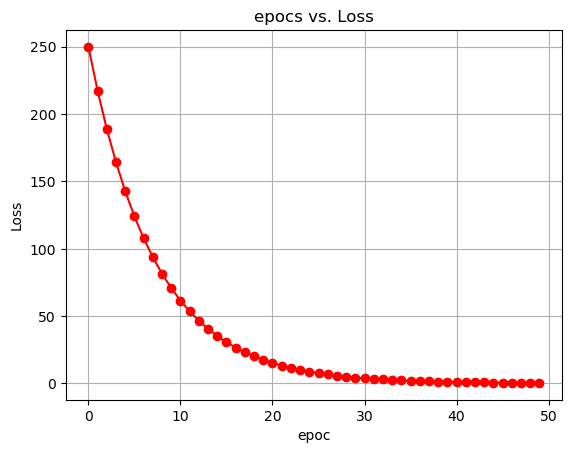

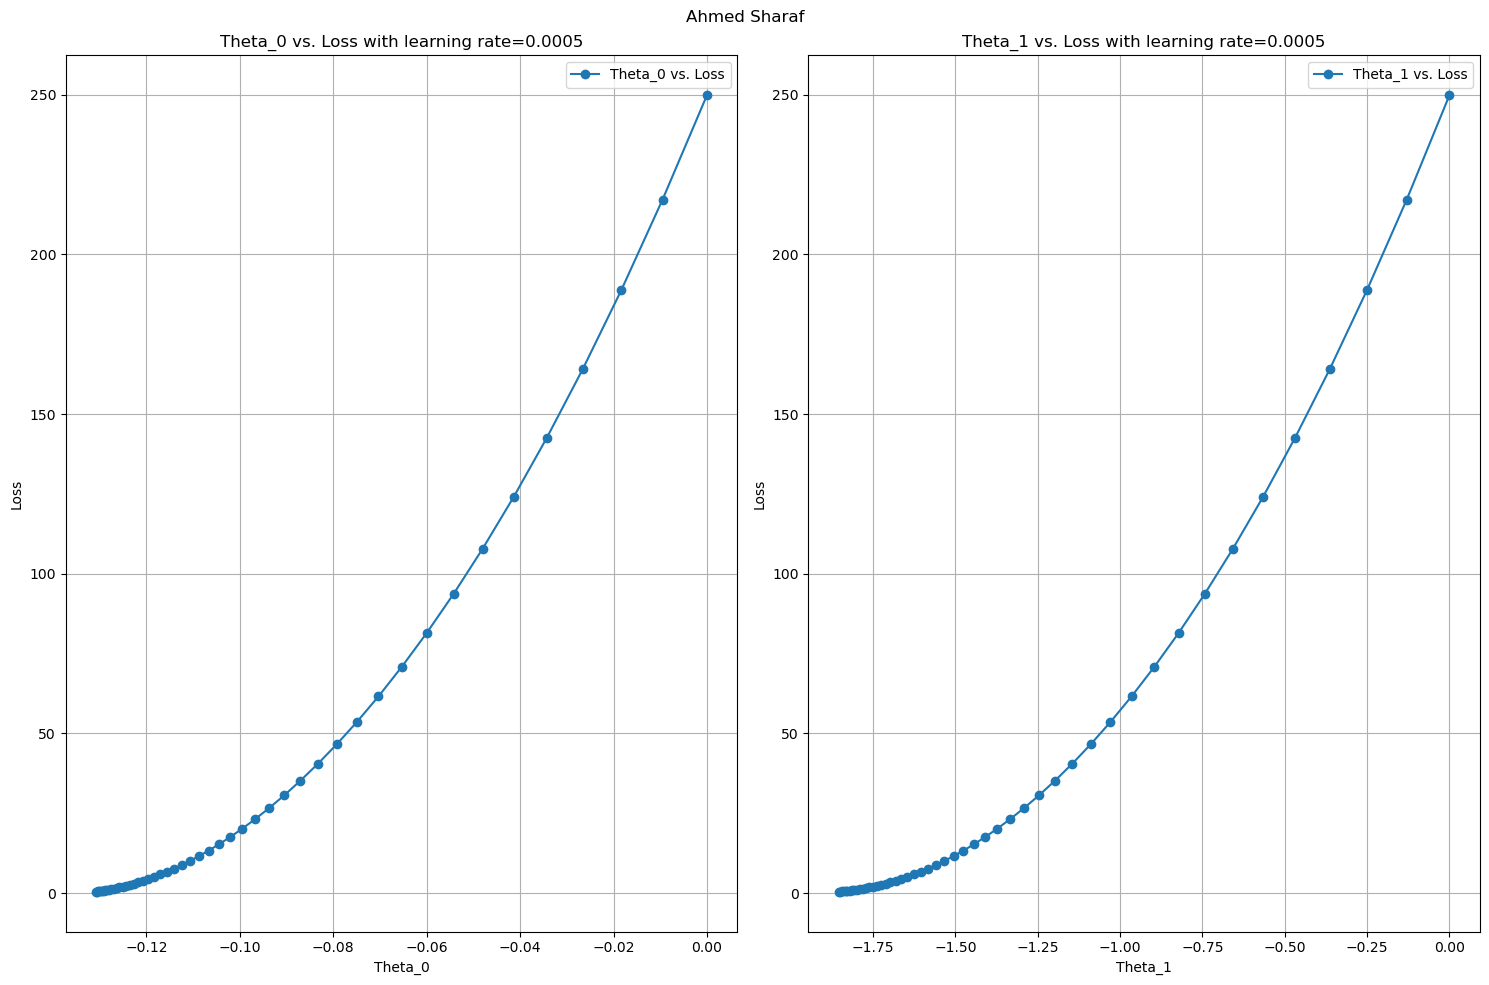

In [15]:
y_pred = t0 + t1 * X
vis(X,y,y_pred, at0,at1,c,0.0005)

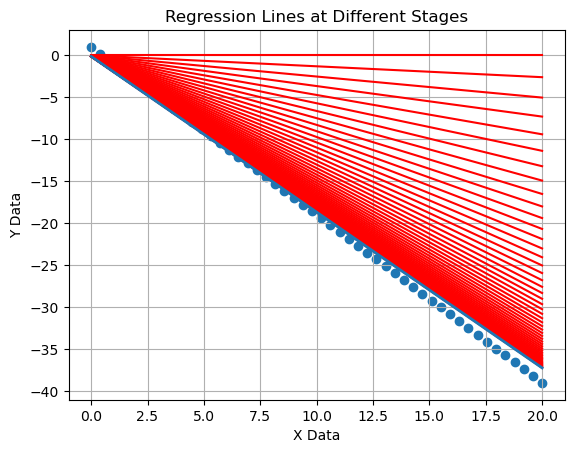

In [16]:
all_curve(X, y, at0, at1)

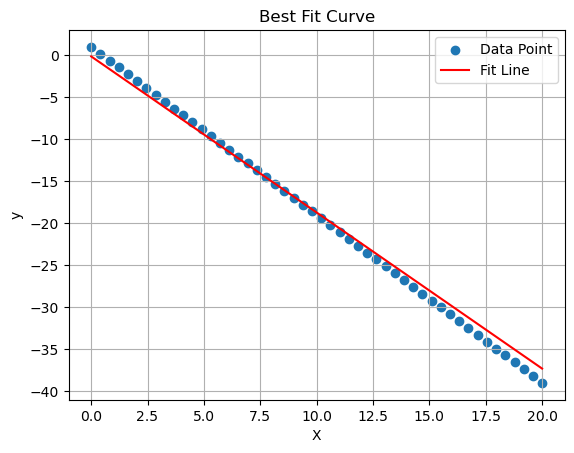

In [17]:
plt_best(X, y, y_pred)

###         2 - Implementation  The Stochastic Gradient Descent 

In [18]:
from sklearn.utils import shuffle

def SGD(x, y_, lr = 0.01, epoch = 1000):
    np.random.seed(101)
    alldata = np.column_stack((x, y_))
    alldata = shuffle(alldata)
    X = alldata[:, :-1].flatten()
    y = alldata[:, -1]    
    m = len(X)
    
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    
    for i in range(epoch):
        for j in range(m):
            theta_0_all.append(theta_0)
            theta_1_all.append(theta_1)
            y_pred = theta_0 + theta_1 * X[j]
            error = y_pred - y[j]
            J = (error ** 2) / 2
            losses.append(J)
            grad_0 = error
            grad_1 = error * X[j]
            norm = np.linalg.norm(np.array([grad_0, grad_1]))
            if norm < 0.001:
                return theta_0, theta_1, theta_0_all, theta_1_all, losses
            theta_0 = theta_0 - lr * grad_0
            theta_1 = theta_1 - lr * grad_1
        # Convergence check
        if ((i > 1) and (abs(losses[- 1] - losses[-(m+1)]) < 0.001)):
            break
    return theta_0, theta_1, theta_0_all, theta_1_all, losses

In [19]:
theta_0,theta_1, theta_0_all, theta_1_all, losses  = SGD(X,y,0.0005,300)
y_pred = t0 + t1 * X

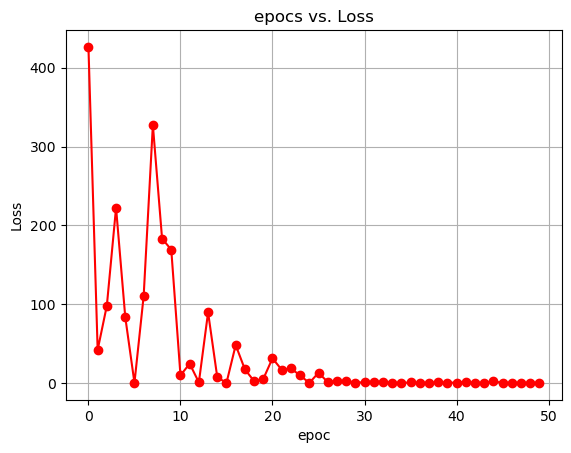

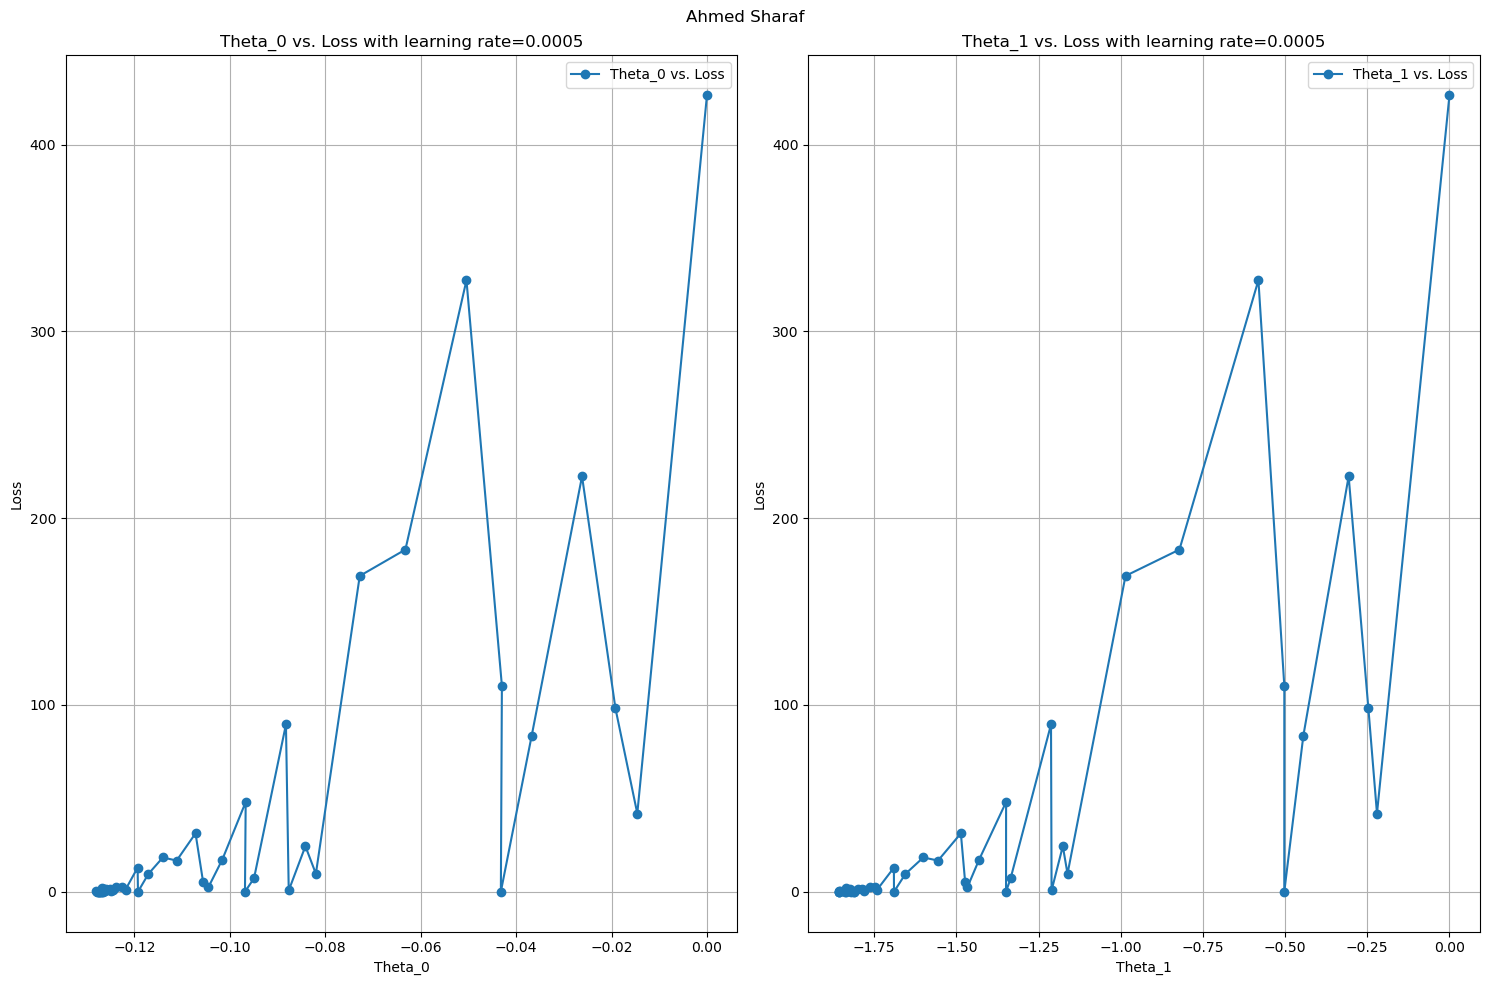

In [24]:
vis(X, y, y_pred, theta_0_all[:50], theta_1_all[:50], losses[:50], 0.0005)

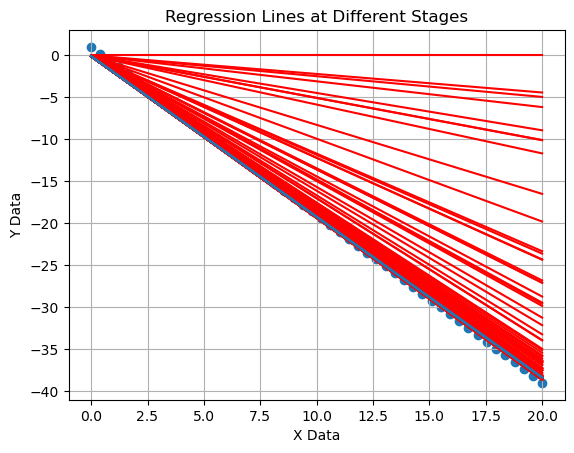

In [29]:
all_curve(X, y, theta_0_all, theta_1_all)

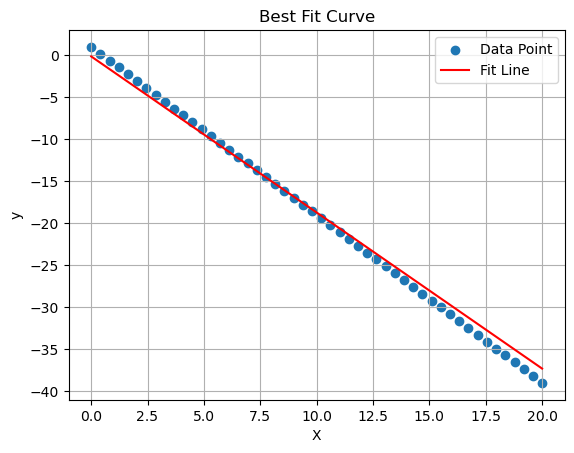

In [27]:
plt_best(X, y, y_pred)

###         3 - Implementation  The Mini-Batch Gradient Descent 

In [30]:
from sklearn.utils import shuffle

def MGD(x, y_, lr = 0.1, epoch = 1000, b = 32):
    np.random.seed(101)
    alldata = np.column_stack((x, y_))
    alldata = shuffle(alldata)
    X = alldata[:, :-1].flatten()
    y = alldata[:, -1]    
    m = len(X)
    
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    
    number_of_batches = m // b

    for i in range(epoch):
        for j in range(number_of_batches):
            start = j * b
            end = start + b
            theta_0_all.append(theta_0)
            theta_1_all.append(theta_1)
            y_pred = theta_0 + theta_1 * X[start:end]
            error = y_pred - y[start:end]
            J = np.sum(error ** 2) / (2 * b)
            losses.append(J)
            grad_0 = np.sum(error) / b
            grad_1 = np.sum(error * X[start:end]) / b
            norm = np.linalg.norm(np.array([grad_0, grad_1]))
            if norm < 0.1:
                return theta_0, theta_1, theta_0_all, theta_1_all, losses
            theta_0 = theta_0 - lr * grad_0
            theta_1 = theta_1 - lr * grad_1
        
    return theta_0, theta_1, theta_0_all, theta_1_all, losses

In [31]:
theta_0, theta_1, theta_0_all, theta_1_all, losses= MGD(X,y,0.0005,300,20)
y_pred = theta_0 + theta_1 * X

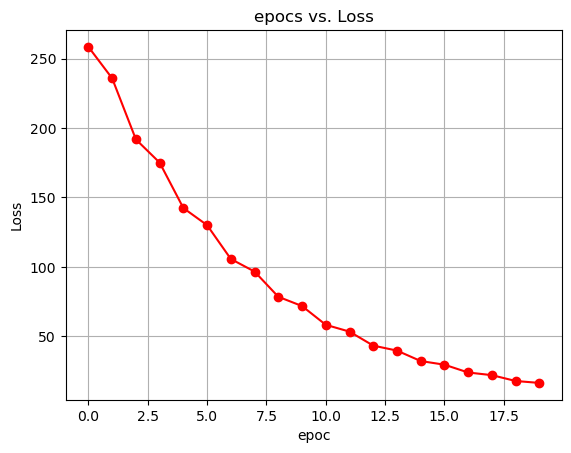

In [32]:
loss_epoch(losses[:20])

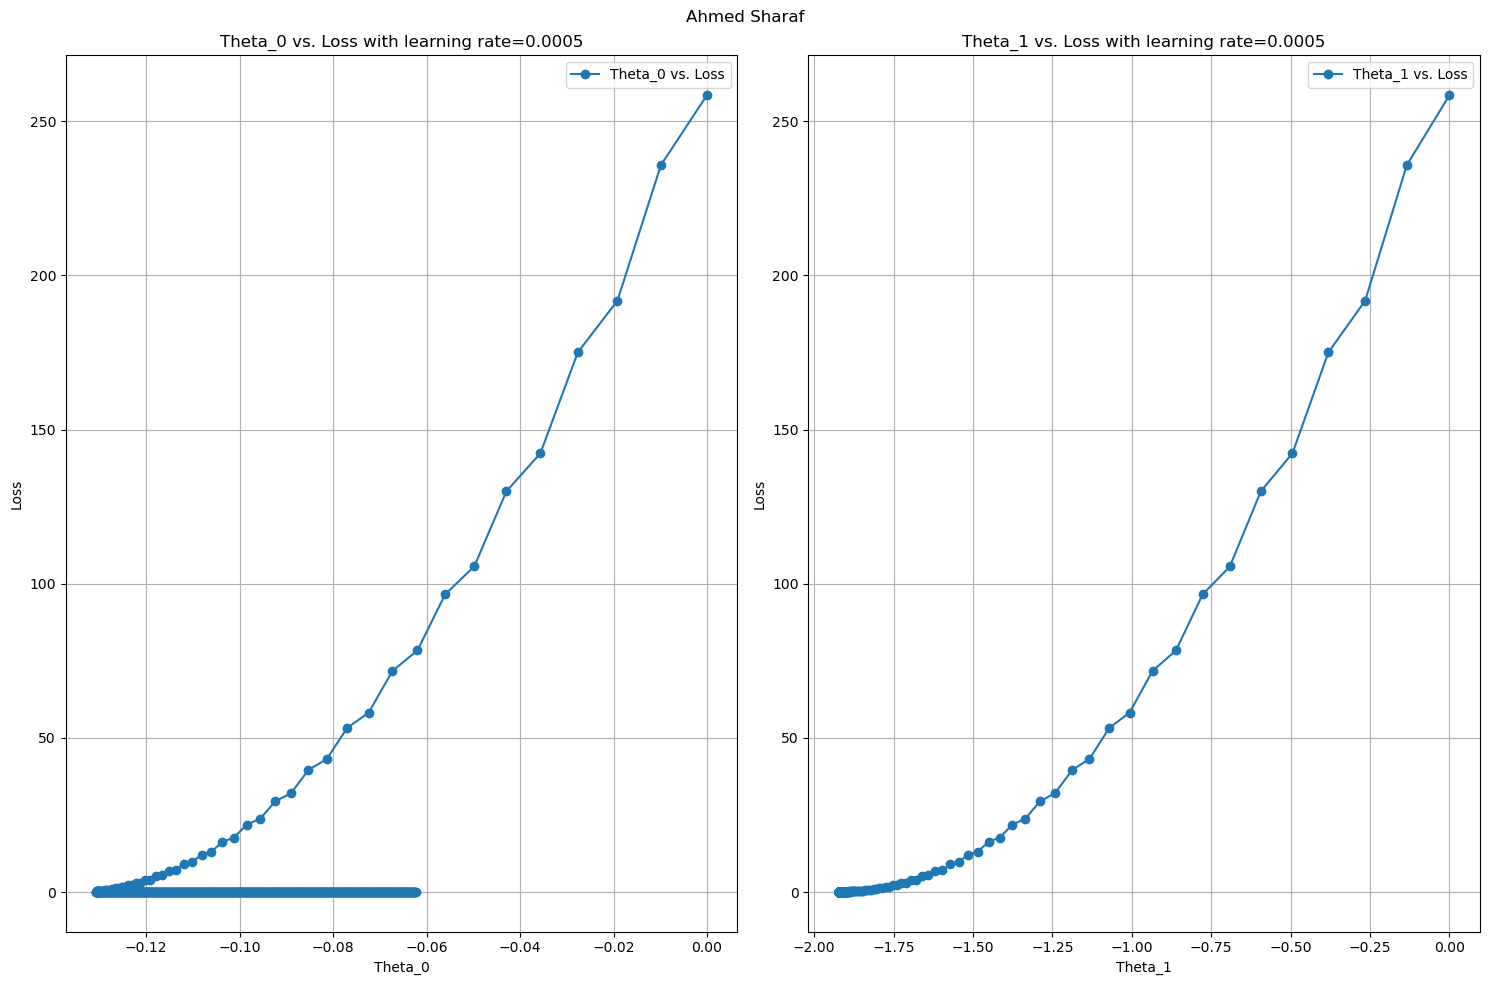

In [33]:
theta_loss(theta_0_all, theta_1_all, losses, 0.0005)

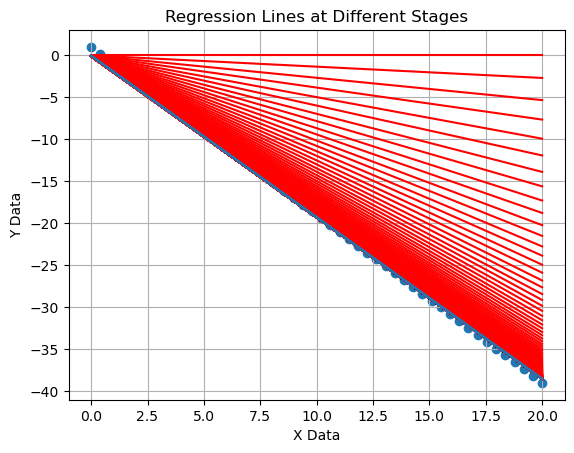

In [34]:
all_curve(X, y, theta_0_all, theta_1_all)

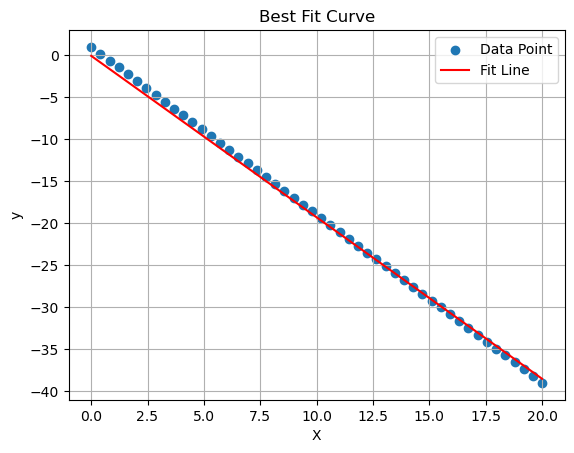

In [35]:
plt_best(X, y, y_pred)